# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


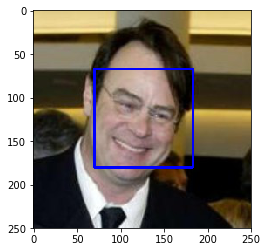

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [3]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

In [5]:
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

n_faces = 0 
for file in human_files_short:
    if face_detector(file) == True:
        n_faces += 1

n_dogs = 0
for file in dog_files_short:
    if face_detector(file) == True:
        n_dogs += 1

print('Performance; Humans w. faces: {}/{}, Dogs w. human faces: {}/{}'.format(n_faces,100,n_dogs,100))

Performance; Humans w. faces: 98/100, Dogs w. human faces: 17/100


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [4]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    print("... Running on GPU ...")
    VGG16 = VGG16.cuda()
    
print(VGG16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 120634250.38it/s]


... Running on GPU ...
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [5]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

print(torch.__version__)

path = dog_files_short[0]
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    from torch.autograd import Variable

    #img = cv2.imread(img_path)
    # convert BGR image to RGB for plotting
    #cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # display the image, along with bounding box
    #plt.imshow(cv_rgb)
    #plt.show()
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    
    transformer = transforms.Compose([transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                          normalize])
    
    image = Image.open(img_path)
    image = transformer(image).float()
    image = Variable(image, requires_grad = True)
    image = image.unsqueeze(0) 
    if use_cuda: 
        image = image.cuda()
    VGG16.eval()
    fc_out = VGG16(image)
    
    fc_out = fc_out.cpu()
    output = fc_out.detach().numpy()
    #print(output.argmax())
    
    
    return output.argmax() # predicted class 

VGG16_predict(path)

0.4.0


225

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    out = VGG16_predict(img_path)
    
    return out >= 151 and out <= 268 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
n_dogs = 0
for file in dog_files_short:
    if dog_detector(file) == True:
        n_dogs += 1

n_faces = 0 
for file in human_files_short:
    if dog_detector(file) == True:
        n_faces += 1

print('Performance; Humans are dogs: {}/{}, Dogs are dogs: {}/{}'.format(n_faces,100,n_dogs,100))

Performance; Humans are dogs: 1/100, Dogs are dogs: 91/100


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [6]:
import os
from torchvision import datasets


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

import torchvision.datasets as datasets
import torchvision.transforms as transforms

nWorkers = 0
batch_size = 20

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

trans_train = transforms.Compose([transforms.RandomResizedCrop(224),
                                          transforms.RandomHorizontalFlip(),
                                          transforms.RandomRotation(45),
                                          transforms.ToTensor(),
                                          normalize])

trans_valid = transforms.Compose([transforms.RandomResizedCrop(224),
                                          transforms.RandomHorizontalFlip(),
                                          transforms.RandomRotation(45),
                                          transforms.ToTensor(),
                                          normalize])

trans_test = transforms.Compose([transforms.RandomResizedCrop(224),transforms.ToTensor(),normalize])

dog_files = np.array(glob("/data/dog_images/*"))
print(dog_files)

train_path = dog_files[0]
valid_path = dog_files[2]
test_path = dog_files[1]

train_data = datasets.ImageFolder(train_path, trans_train)
valid_data = datasets.ImageFolder(valid_path, trans_valid)
test_data = datasets.ImageFolder(test_path, trans_test)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers=nWorkers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers=nWorkers)
val_loader = torch.utils.data.DataLoader(valid_data, batch_size = batch_size, shuffle = True, num_workers=nWorkers)

loaders_scratch = {'train':train_loader,
                   'test':test_loader,
                   'valid':val_loader}


['/data/dog_images/train' '/data/dog_images/test' '/data/dog_images/valid']


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

I picked 224x224 px for the input tensor since this mean that I can use the same data/loaders_scratch and transformations/augmentations in the next assignment where I decided to again use VGG16 as the transfer learning model.

First the code resizes the image by a Random Resized Crop.

I decided to augment the training and validation data similarly: Random Horizontal Flip, and Random Rotation up to 45 degrees.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [7]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        self.conv1 = nn.Conv2d(3,32,3,padding=1) #initial: 3,16
        self.conv2 = nn.Conv2d(32,64,3,padding = 1) #initial 16,32
        self.conv3 = nn.Conv2d(64,64,5,padding = 2) #initial 32, 32
        self.conv4 = nn.Conv2d(64,128,3,padding = 1) #initial 32, 64
        self.conv5 = nn.Conv2d(128,128,3,padding=1) 
        self.pool2 = nn.MaxPool2d(2,2)
        #self.pool3 = nn.MaxPool2d(3,3)
        self.pool4 = nn.MaxPool2d(4,4)
    
        self.dropout = nn.Dropout(p=0.15)
        
        fclayers = [7*7*128, 4096, 1024, 133]
        self.fcl1 = nn.Linear(fclayers[0],fclayers[1])
        self.fcl2 = nn.Linear(fclayers[1],fclayers[2])
        self.fcl3 = nn.Linear(fclayers[2],fclayers[3])
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool4(F.relu(self.conv3(x)))
        x = self.pool2(F.relu(self.conv4(x)))
        x = self.pool2(F.relu(self.conv5(x)))
        
        x = x.view(x.shape[0],-1)
        
        x = self.dropout(F.relu(self.fcl1(x)))
        x = self.dropout(F.relu(self.fcl2(x)))
        x = self.dropout(F.relu(self.fcl3(x)))
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

*Convolutional Layers*:
I started of with 4 convolutional layers 

    self.conv1 = nn.Conv2d(3,16,3,padding=1) 
    self.conv2 = nn.Conv2d(16,32,3,padding = 1) 
    self.conv3 = nn.Conv2d(32,32,5,padding = 2) 
    self.conv4 = nn.Conv2d(32,64,3,padding = 1)
    self.pool2 = nn.MaxPool2d(2,2)
    self.pool4 = nn.MaxPool2d(4,4)
    
    Which I combined as follows in the forward pass:
    x = F.relu(self.conv1(x))
    x = self.pool2(F.relu(self.conv2(x)))
    x = self.pool4(F.relu(self.conv3(x)))
    x = self.pool2(F.relu(self.conv4(x)))
    
    where x is the image input.
    
After having experimented with augmentation and running for around 100 epochs I realized that I could not obtain an accuracy larger than 6%. My reasoning in creaingt this architecture was that I had an impression that the CNN would develop better if the amount of filers increased slowly for each layer: 3,16,32,64, as these has primarily been the amount of filters we have used in the previous noteboo excercises. In the forward pass I thought that not using a pooling layer on the first convolution would give the possibility to obtain more data/features before it would be reduced by a pooling layer and thus being able to classify better in the earlier convolutional layers. Further I decided I would reduce the size of the features by a factor of 4 with a Max-Pooling layer with kernel and stride 4. Likewise I increased the kernelsize and stride on the third convolutional layer. I thought a combination with a Pool(4,4) and a larger kernel size and padding in the convolutional layer would reduce the features in a beneficial way. However the validation loss with this architecture would already stagnate at 60-70 epochs with an accuracy too low. I concluded that the model simply wasn't good enough to detect the small details that distinguishes dogs from eachother.
    
Therefore I changed the architecture to the current architecture by increasing the amount of filters at each convolutional layer, and adding an extra layer by increasing them in order: 3,32,64,128 and adding an extra layer in the end with 128,128 filters, and also using an extra max-pooling layer in the end reducing the size of the image by another factor of 2. In end 125 epochs (incluing more potential for training, as the validation loss has not stagnated yet) gave me an 11% accuracy.
    
*Linear layers*:
I kept this part constant with 3 fully connected linear layers in my process in developing the architecture, with a dropout probability of 15%.

In the beginning the fully connected layers had an evolution of amount of nodes from 14x14x64=12544 input nodes from the convolutional layers decreasing to 4096,1024 and then 133. After changing the arcitecture with the CNN to its current configuation the input layer to the fully connected layers were reduced to: 7x7x128=6272.
  

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [8]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [9]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output,target)
            loss.backward()
            optimizer.step()
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output,target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
    # return trained model
    return model

In [10]:
# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.890054 	Validation Loss: 4.889852
Epoch: 2 	Training Loss: 4.889543 	Validation Loss: 4.889309
Epoch: 3 	Training Loss: 4.889106 	Validation Loss: 4.888927
Epoch: 4 	Training Loss: 4.888665 	Validation Loss: 4.888493
Epoch: 5 	Training Loss: 4.887977 	Validation Loss: 4.888063
Epoch: 6 	Training Loss: 4.887367 	Validation Loss: 4.887453
Epoch: 7 	Training Loss: 4.886987 	Validation Loss: 4.886822
Epoch: 8 	Training Loss: 4.886260 	Validation Loss: 4.885602
Epoch: 9 	Training Loss: 4.884130 	Validation Loss: 4.883887
Epoch: 10 	Training Loss: 4.882647 	Validation Loss: 4.880484
Epoch: 11 	Training Loss: 4.880040 	Validation Loss: 4.877511
Epoch: 12 	Training Loss: 4.877323 	Validation Loss: 4.874324
Epoch: 13 	Training Loss: 4.875433 	Validation Loss: 4.871387
Epoch: 14 	Training Loss: 4.873627 	Validation Loss: 4.865152
Epoch: 15 	Training Loss: 4.866289 	Validation Loss: 4.858832
Epoch: 16 	Training Loss: 4.857787 	Validation Loss: 4.848300
Epoch: 17 	Traini

In [14]:
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch2.pt')

Epoch: 1 	Training Loss: 4.136106 	Validation Loss: 4.145548
Epoch: 2 	Training Loss: 4.114465 	Validation Loss: 4.156142
Epoch: 3 	Training Loss: 4.114882 	Validation Loss: 4.143891
Epoch: 4 	Training Loss: 4.105732 	Validation Loss: 4.095363
Epoch: 5 	Training Loss: 4.060099 	Validation Loss: 4.048381
Epoch: 6 	Training Loss: 4.095944 	Validation Loss: 4.117410
Epoch: 7 	Training Loss: 4.072570 	Validation Loss: 4.105937
Epoch: 8 	Training Loss: 4.039130 	Validation Loss: 4.015070
Epoch: 9 	Training Loss: 4.029241 	Validation Loss: 4.052051
Epoch: 10 	Training Loss: 4.017908 	Validation Loss: 4.026798
Epoch: 11 	Training Loss: 3.996999 	Validation Loss: 4.122587
Epoch: 12 	Training Loss: 4.004701 	Validation Loss: 4.070208
Epoch: 13 	Training Loss: 3.994948 	Validation Loss: 4.072379
Epoch: 14 	Training Loss: 3.977072 	Validation Loss: 4.065992
Epoch: 15 	Training Loss: 3.974859 	Validation Loss: 4.006764
Epoch: 16 	Training Loss: 3.983539 	Validation Loss: 4.009606
Epoch: 17 	Traini

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [11]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [15]:
model_scratch.load_state_dict(torch.load('model_scratch2.pt'))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.031376


Test Accuracy: 11% (96/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [16]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [17]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

#Set out_features of last layer in classifier to 133.
model_transfer.classifier[6].out_features = 133
    
print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

The VGG16 model does orignially have 1000 outputs or classes it can detect. Of those it already catogorises just shy of 120 dog breeds, not including wolves and other dog-like species.

Just like the VGG16 model was just for the dog-detector, I decided to try it out as a classifier. Thus I changed the final linear layer in the network from 1000 to 133.

To me it seems like the validation loss still has potential to decrease, thus obtaining a better accuracy. I think this arcitecture is suitable for the dog-breed problem, as the VGG16 is successfull in categorising 1000 different classes, and is already pre-trained on animals. Therefore I believe it should perform well given the current problem.

Experimenting with the amount of epochs and not wanting to waste computation time on the GPU I settled on 25 epochs, and optianed 69 % accuracy.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [18]:
from torch import nn
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr = 0.005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
# train the model
model_transfer = train(25, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 5.329648 	Validation Loss: 3.424407
Epoch: 2 	Training Loss: 3.140267 	Validation Loss: 2.206799
Epoch: 3 	Training Loss: 2.374865 	Validation Loss: 1.841184
Epoch: 4 	Training Loss: 2.083701 	Validation Loss: 1.657083
Epoch: 5 	Training Loss: 1.868999 	Validation Loss: 1.548247
Epoch: 6 	Training Loss: 1.742615 	Validation Loss: 1.543864
Epoch: 7 	Training Loss: 1.604774 	Validation Loss: 1.466431
Epoch: 8 	Training Loss: 1.524769 	Validation Loss: 1.429897
Epoch: 9 	Training Loss: 1.472200 	Validation Loss: 1.427242
Epoch: 10 	Training Loss: 1.430387 	Validation Loss: 1.358745
Epoch: 11 	Training Loss: 1.338843 	Validation Loss: 1.404562
Epoch: 12 	Training Loss: 1.287396 	Validation Loss: 1.325479
Epoch: 13 	Training Loss: 1.229145 	Validation Loss: 1.307274
Epoch: 14 	Training Loss: 1.223839 	Validation Loss: 1.319088
Epoch: 15 	Training Loss: 1.159396 	Validation Loss: 1.282360
Epoch: 16 	Training Loss: 1.101108 	Validation Loss: 1.292323
Epoch: 17 	Traini

### Martin: Comments on training the model_transfer

I tried training the dog breed dectectin model for a different number of epochs and found that while 25 epochs might be on the shy end with a possibility to obtain a lower validation loss. However, 25 epochs was enough to get more than 60% accuracy, and in order to waste computation time on this I decided to stop training after 25 epochs.

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [19]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

test(loaders_transfer, model_transfer, criterion_transfer,use_cuda)

Test Loss: 1.075755


Test Accuracy: 69% (581/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [20]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
#print(train_data.classes)
class_names = [item[4:].replace("_", " ") for item in train_data.classes]
#print(len(class_names))
#print(class_names[0])

fc_out = 0
output = 0

from torch.autograd import Variable

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    model_transfer.eval()
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    
    transformer = transforms.Compose([transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                          normalize])
    
    image = Image.open(img_path)
    image = transformer(image).float()
    image = Variable(image, requires_grad = True)
    image = image.unsqueeze(0) 
    if use_cuda: 
        image = image.cuda()
        
    fc_out = model_transfer(image)
    fc_out = fc_out.cpu()
    #print(fc_out)
    output = fc_out.detach().numpy()
    #print(output)
    index = output.argmax()
    #print(len(output))
    #print(index)
    return class_names[index], index

path = dog_files_short[0]
print(path)
predict_breed_transfer(path)

/data/dog_images/train/103.Mastiff/Mastiff_06833.jpg


('Mastiff', 102)

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

Hello human!
You and this Affenpinscher seem to have something in common


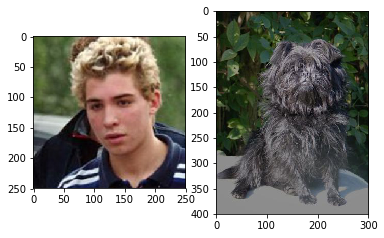


Hello dog!
You and this Doberman pinscher seem to have something in common


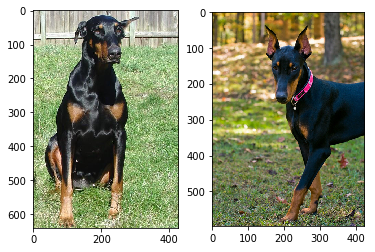

In [21]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

dog_folders = np.array(glob("/data/dog_images/train/*"))
dog_folders.sort()
#print(dog_folders)

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = cv2.imread(img_path)
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    species_detected = ''
    breed = ''
    index = []
    if face_detector(img_path) == True and dog_detector(img_path) == False: #Human dectected
        breed,index = predict_breed_transfer(img_path)
        species_detected = 'human'
        
    elif face_detector(img_path) == False and dog_detector(img_path) == True: #Dog dectected
        species_detected = 'dog'
        breed,index = predict_breed_transfer(img_path)
        
    elif face_detector(img_path) == True and dog_detector(img_path) == True: #Both human nor dog
        species_detected = 'human-dog hybrid'
        breed,index = predict_breed_transfer(img_path)
        
    elif face_detector(img_path) == False and dog_detector(img_path) == False:#Neither human nor dog.
        print('Hello... You are niether human, dog, or human-dog hybrid. \n No dog breed predictions can be provided.')
    
    seperator = '/'
    if len(breed) > 1 and len(species_detected) > 1:
        path2 = seperator.join([dog_folders[index],'*'])
        path2 = np.array(glob(path2))
        img2 = cv2.imread(path2[0])
        cv_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        
        
        print('Hello {}!'.format(species_detected))
        print('You and this',breed,'seem to have something in common')
        ax1 = plt.subplot(1,2,1)
        ax1.imshow(cv_rgb)
        
        ax2 = plt.subplot(1,2,2)
        ax2.imshow(cv_rgb2)
        plt.show()
        print('')
    
    return None
path = human_files_short[2]
run_app(path)
path = dog_files_short[80]
run_app(path)

# ---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

1. Of course one possible point of improvement could be more training, however there is a limit to how much the accuracy can increase given more training. Therefore this is a very limited, but also fast was to see if better accuracy can be obtained.

2. The VGG16 model already has pre-trained parameters in the convolutional layers and I only allowed the parameters in the classifier to change. From here I see 2 possibilities.

    a) Adding another linear layer. I think there is enough nodes in the first 3 nodes that another linear layer could benificically be added to the classifier to obtain better accuracy.
    
    b) allowing the parameters in the convolutional layers to adapt better to our problem. Currently the VGG16 model (used for as transfer learning) is suited and pre-trained to be able to classify 1000 different classes with everything from cars, trucks, planes, to a long suite of animals. I think allowing the parameters in the Convolutional part of the model to adapt from their current state to out dog breed problem, would be able to produce a stronger ouput that could be better at distinguishing some of the dog species which it currently has issues with.
    
Lastly I find it funny that 2 pictures of me, one with glasses and one without produces outputs with two entirely different breeds of dogs. I guess that this was expected. But I'm wondering how the model actually responds when it sees a human. I believe in the similarity between myself and the Pharaoh hound in in terms of color of my shirt and the dog, and the "short" fur, however other dog breeds have that too. I believe the resemblance to a Pharaoh hound compared to other short-fur'red brown-orange-ish dogs is very small. However I'm not sure what the CNN sees in the second picture of me and a Dogue de Bordeaux, besides the lighting in the picture being very alike the color of the dog. I guess one shouldn't put much thought into this. It would be nice to see how significant one dog breed is compared to another, given the picture of the human. 

In terms of the dog-pictures I have provided I think it does extraordinary well. I know that Roo (dog 1) is a mutt, and is a mix of alot of breeds - however I don't think she has any tibetan mastiff in her at all. 

But the 2 english springer spaniels (dog 2 and 4) are actually english springer spaniels, and I think this is cool compared to all the different kind of spaniels there are (however given the spaniels in the training data some spaniel-breeds are only brown and not white-spotted), so it might have been an easy task?

Whether Werner (dog 3) is actually an enligsh sheep dog I would have to say "go fish". But I think the two breeds are difinitly related. I think the model is doing the dog classification quite well. 

#me and dogs in my vicinity
Hello human!
You and this Pharaoh hound seem to have something in common


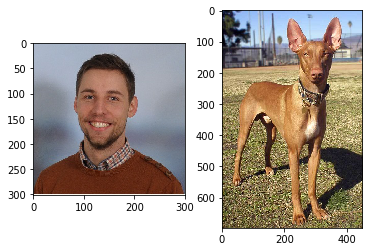


Hello human!
You and this Dogue de bordeaux seem to have something in common


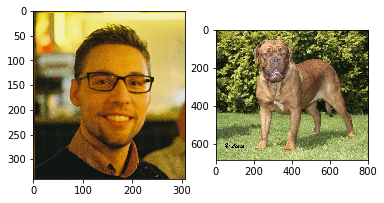


Hello dog!
You and this Tibetan mastiff seem to have something in common


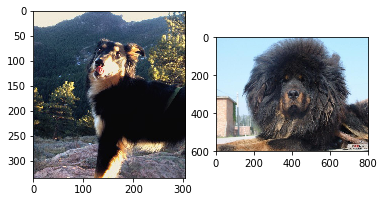


Hello... You are niether human, dog, or human-dog hybrid. 
 No dog breed predictions can be provided.
Hello dog!
You and this English springer spaniel seem to have something in common


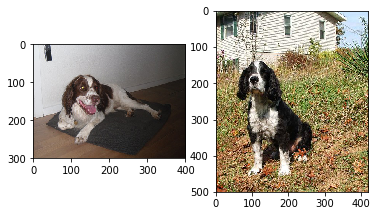


Hello dog!
You and this Old english sheepdog seem to have something in common


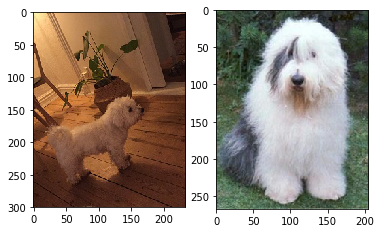


Hello dog!
You and this English springer spaniel seem to have something in common


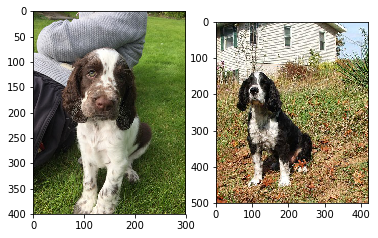

In [22]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

print('#me and dogs in my vicinity')
Martin_photos = ['CV_foto.JPG','F1000005.JPG','Roo.jpg','squirrel.jpg','twist.jpg','werner.jpg','sif.jpg']

for picture in Martin_photos:
    run_app(picture)

## suggested code, below
#for file in np.hstack((human_files_short[:3], dog_files_short[:3])):
    #run_app(file)